In [30]:
%matplotlib inline

import os

import IPython.display as ipd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as skl
import sklearn.utils, sklearn.preprocessing, sklearn.decomposition, sklearn.svm
import librosa
import librosa.display

import utils

plt.rcParams['figure.figsize'] = (17, 5)

In [19]:
!pip install pydot

You are using pip version 18.0, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [33]:
# Directory where mp3 are stored.
AUDIO_DIR = os.environ.get('/fma_small')

# Load metadata and features.
tracks = utils.load('../fma_metadata/tracks.csv')
genres = utils.load('../fma_metadata/genres.csv')
features = utils.load('../fma_metadata/features.csv')
echonest = utils.load('../fma_metadata/echonest.csv')

np.testing.assert_array_equal(features.index, tracks.index)
assert echonest.index.isin(tracks.index).all()

tracks.shape, genres.shape, features.shape, echonest.shape

((106574, 52), (163, 4), (106574, 518), (13129, 249))

In [18]:
ipd.display(tracks['track'].head())
ipd.display(tracks['album'].head())
ipd.display(tracks['artist'].head())
ipd.display(tracks['set'].head())



bit_rate  comments   composer        date_created date_recorded  \
track_id                                                                    
2           256000         0        NaN 2008-11-26 01:48:12    2008-11-26   
3           256000         0        NaN 2008-11-26 01:48:14    2008-11-26   
5           256000         0        NaN 2008-11-26 01:48:20    2008-11-26   
10          192000         0  Kurt Vile 2008-11-25 17:49:06    2008-11-26   
20          256000         0        NaN 2008-11-26 01:48:56    2008-01-01   

          duration  favorites genre_top     genres         genres_all  \
track_id                                                                
2              168          2   Hip-Hop       [21]               [21]   
3              237          1   Hip-Hop       [21]               [21]   
5              206          6   Hip-Hop       [21]               [21]   
10             161        178       Pop       [10]               [10]   
20             311          0       NaN  [76, 103]  [17, 10, 76, 103]   

         information  interest language_code  \
track_id                                       
2                NaN      4656            en   
3                NaN      1470            en   
5                NaN      1933            en   
10               NaN     54881            en   
20               NaN       978            en   

                                                    license  listens lyricist  \
track_id                                                                        
2         Attribution-NonCommercial-ShareAlike 3.0 Inter...     1293      NaN   
3         Attribution-NonCommercial-ShareAlike 3.0 Inter...      514      NaN   
5         Attribution-NonCommercial-ShareAlike 3.0 Inter...     1151      NaN   
10        Attribution-NonCommercial-NoDerivatives (aka M...    50135      NaN   
20        Attribution-NonCommercial-NoDerivatives (aka M...      361      NaN   

          number publisher tags            title  
track_id                                          
2              3       NaN   []             Food  
3              4       NaN   []     Electric Ave  
5              6       NaN   []       This World  
10             1       NaN   []          Freeway  
20             3       NaN   []  Spiritual Level

comments        date_created date_released engineer  favorites  id  \
track_id                                                                       
2                0 2008-11-26 01:44:45    2009-01-05      NaN          4   1   
3                0 2008-11-26 01:44:45    2009-01-05      NaN          4   1   
5                0 2008-11-26 01:44:45    2009-01-05      NaN          4   1   
10               0 2008-11-26 01:45:08    2008-02-06      NaN          4   6   
20               0 2008-11-26 01:45:05    2009-01-06      NaN          2   4   

                                        information  listens producer tags  \
track_id                                                                     
2                                           <p></p>     6073      NaN   []   
3                                           <p></p>     6073      NaN   []   
5                                           <p></p>     6073      NaN   []   
10                                              NaN    47632      NaN   []   
20        <p> "spiritual songs" from Nicky Cook</p>     2710      NaN   []   

                         title  tracks   type  
track_id                                       
2         AWOL - A Way Of Life       7  Album  
3         AWOL - A Way Of Life       7  Album  
5         AWOL - A Way Of Life       7  Album  
10           Constant Hitmaker       2  Album  
20                       Niris      13  Album

active_year_begin active_year_end  \
track_id                                     
2               2006-01-01             NaT   
3               2006-01-01             NaT   
5               2006-01-01             NaT   
10                     NaT             NaT   
20              1990-01-01      2011-01-01   

                                          associated_labels  \
track_id                                                      
2                                                       NaN   
3                                                       NaN   
5                                                       NaN   
10        Mexican Summer, Richie Records, Woodsist, Skul...   
20                                                      NaN   

                                                        bio  comments  \
track_id                                                                
2         <p>A Way Of Life, A Collective of Hip-Hop from...         0   
3         <p>A Way Of Life, A Collective of Hip-Hop from...         0   
5         <p>A Way Of Life, A Collective of Hip-Hop from...         0   
10        <p><span style="font-family:Verdana, Geneva, A...         3   
20        <p>Songs written by: Nicky Cook</p>\n<p>VOCALS...         2   

                date_created  favorites  id   latitude            location  \
track_id                                                                     
2        2008-11-26 01:42:32          9   1  40.058324          New Jersey   
3        2008-11-26 01:42:32          9   1  40.058324          New Jersey   
5        2008-11-26 01:42:32          9   1  40.058324          New Jersey   
10       2008-11-26 01:42:55         74   6        NaN                 NaN   
20       2008-11-26 01:42:52         10   4  51.895927  Colchester England   

          longitude                                            members  \
track_id                                                                 
2        -74.405661  Sajje Morocco,Brownbum,ZawidaGod,Custodian of ...   
3        -74.405661  Sajje Morocco,Brownbum,ZawidaGod,Custodian of ...   
5        -74.405661  Sajje Morocco,Brownbum,ZawidaGod,Custodian of ...   
10              NaN                           Kurt Vile, the Violators   
20         0.891874                                       Nicky Cook\n   

                name                                   related_projects  \
track_id                                                                  
2               AWOL  The list of past projects is 2 long but every1...   
3               AWOL  The list of past projects is 2 long but every1...   
5               AWOL  The list of past projects is 2 long but every1...   
10         Kurt Vile                                                NaN   
20        Nicky Cook                                                NaN   

                                                       tags  \
track_id                                                      
2                                                    [awol]   
3                                                    [awol]   
5                                                    [awol]   
10                                      [philly, kurt vile]   
20        [instrumentals, experimental pop, post punk, e...   

                                          website wikipedia_page  
track_id                                                          
2         http://www.AzillionRecords.blogspot.com            NaN  
3         http://www.AzillionRecords.blogspot.com            NaN  
5         http://www.AzillionRecords.blogspot.com            NaN  
10                            http://kurtvile.com            NaN  
20                                            NaN            NaN

split  subset
track_id                  
2         training   small
3         training  medium
5         training   small
10        training   small
20        training   large

In [19]:
#2 Genres
#The genre hierarchy is stored in genres.csv and distributed in fma_metadata.zip.


print('{} top-level genres'.format(len(genres['top_level'].unique())))
genres.loc[genres['top_level'].unique()].sort_values('#tracks', ascending=False)

16 top-level genres


#tracks  parent                title  top_level
genre_id                                                 
38          38154       0         Experimental         38
15          34413       0           Electronic         15
12          32923       0                 Rock         12
1235        14938       0         Instrumental       1235
10          13845       0                  Pop         10
17          12706       0                 Folk         17
21           8389       0              Hip-Hop         21
2            5271       0        International          2
4            4126       0                 Jazz          4
5            4106       0            Classical          5
9            1987       0              Country          9
20           1876       0               Spoken         20
3            1752       0                Blues          3
14           1499       0             Soul-RnB         14
8             868       0  Old-Time / Historic          8
13            730       0       Easy Listening         13

In [20]:
genres.sort_values('#tracks').head(10)

#tracks  parent                     title  top_level
genre_id                                                      
175             0      86                 Bollywood          2
178             0       4                    Be-Bop          4
377             1      19                 Deep Funk         14
173             4      86     N. Indian Traditional          2
493             4     651             Western Swing          9
374             9      20                    Banter         20
808            12      46                     Salsa          2
174            17      86  South Indian Traditional          2
465            18      20           Musical Theater         20
176            23       2                   Pacific          2

In [21]:
#3 Features
#Features extracted from the audio for all tracks.
#For some tracks, data colected from the Echonest API.

print('{1} features for {0} tracks'.format(*features.shape))
columns = ['mfcc', 'chroma_cens', 'tonnetz', 'spectral_contrast']
columns.append(['spectral_centroid', 'spectral_bandwidth', 'spectral_rolloff'])
columns.append(['rmse', 'zcr'])
for column in columns:
    ipd.display(features[column].head().style.format('{:.2f}'))

518 features for 106574 tracks


In [22]:
#3.1 Echonest features

print('{1} features for {0} tracks'.format(*echonest.shape))
ipd.display(echonest['echonest', 'metadata'].head())
ipd.display(echonest['echonest', 'audio_features'].head())
ipd.display(echonest['echonest', 'social_features'].head())
ipd.display(echonest['echonest', 'ranks'].head())

249 features for 13129 tracks


album_date         album_name  artist_latitude  \
track_id                                                   
2                NaN                NaN          32.6783   
3                NaN                NaN          32.6783   
5                NaN                NaN          32.6783   
10        2008-03-11  Constant Hitmaker          39.9523   
134              NaN                NaN          32.6783   

               artist_location  artist_longitude artist_name  \
track_id                                                       
2                  Georgia, US          -83.2230        AWOL   
3                  Georgia, US          -83.2230        AWOL   
5                  Georgia, US          -83.2230        AWOL   
10        Philadelphia, PA, US          -75.1624   Kurt Vile   
134                Georgia, US          -83.2230        AWOL   

                       release  
track_id                        
2         AWOL - A Way Of Life  
3         AWOL - A Way Of Life  
5         AWOL - A Way Of Life  
10           Constant Hitmaker  
134       AWOL - A Way Of Life

acousticness  danceability    energy  instrumentalness  liveness  \
track_id                                                                     
2             0.416675      0.675894  0.634476          0.010628  0.177647   
3             0.374408      0.528643  0.817461          0.001851  0.105880   
5             0.043567      0.745566  0.701470          0.000697  0.373143   
10            0.951670      0.658179  0.924525          0.965427  0.115474   
134           0.452217      0.513238  0.560410          0.019443  0.096567   

          speechiness    tempo   valence  
track_id                                  
2            0.159310  165.922  0.576661  
3            0.461818  126.957  0.269240  
5            0.124595  100.260  0.621661  
10           0.032985  111.562  0.963590  
134          0.525519  114.290  0.894072

artist_discovery  artist_familiarity  artist_hotttnesss  \
track_id                                                            
2                 0.388990            0.386740           0.406370   
3                 0.388990            0.386740           0.406370   
5                 0.388990            0.386740           0.406370   
10                0.557339            0.614272           0.798387   
134               0.388990            0.386740           0.406370   

          song_currency  song_hotttnesss  
track_id                                  
2              0.000000         0.000000  
3              0.000000         0.000000  
5              0.000000         0.000000  
10             0.005158         0.354516  
134            0.000000         0.000000

artist_discovery_rank  artist_familiarity_rank  \
track_id                                                   
2                           NaN                      NaN   
3                           NaN                      NaN   
5                           NaN                      NaN   
10                       2635.0                   2544.0   
134                         NaN                      NaN   

          artist_hotttnesss_rank  song_currency_rank  song_hotttnesss_rank  
track_id                                                                    
2                            NaN                 NaN                   NaN  
3                            NaN                 NaN                   NaN  
5                            NaN                 NaN                   NaN  
10                         397.0            115691.0               67609.0  
134                          NaN                 NaN                   NaN

000       001       002       003       004       005  \
track_id                                                               
2         0.877233  0.588911  0.354243  0.295090  0.298413  0.309430   
3         0.534429  0.537414  0.443299  0.390879  0.344573  0.366448   
5         0.548093  0.720192  0.389257  0.344934  0.361300  0.402543   
10        0.311404  0.711402  0.321914  0.500601  0.250963  0.321316   
134       0.610849  0.569169  0.428494  0.345796  0.376920  0.460590   

               006       007       008       009     ...           214  \
track_id                                             ...                 
2         0.304496  0.334579  0.249495  0.259656     ...     -1.992303   
3         0.419455  0.747766  0.460901  0.392379     ...     -1.582331   
5         0.434044  0.388137  0.512487  0.525755     ...     -2.288358   
10        0.734250  0.325188  0.373012  0.235840     ...     -3.662988   
134       0.401371  0.449900  0.428946  0.446736     ...     -1.452696   

                215       216       217       218      219       220  \
track_id                                                               
2          6.805694  0.233070  0.192880  0.027455  0.06408   3.67696   
3          8.889308  0.258464  0.220905  0.081368  0.06413   6.08277   
5         11.527109  0.256821  0.237820  0.060122  0.06014   5.92649   
10        21.508228  0.283352  0.267070  0.125704  0.08082   8.41401   
134        2.356398  0.234686  0.199550  0.149332  0.06440  11.26707   

               221        222         223  
track_id                                   
2          3.61288  13.316690  262.929749  
3          6.01864  16.673548  325.581085  
5          5.86635  16.013849  356.755737  
10         8.33319  21.317064  483.403809  
134       11.20267  26.454180  751.147705  

[5 rows x 224 columns]

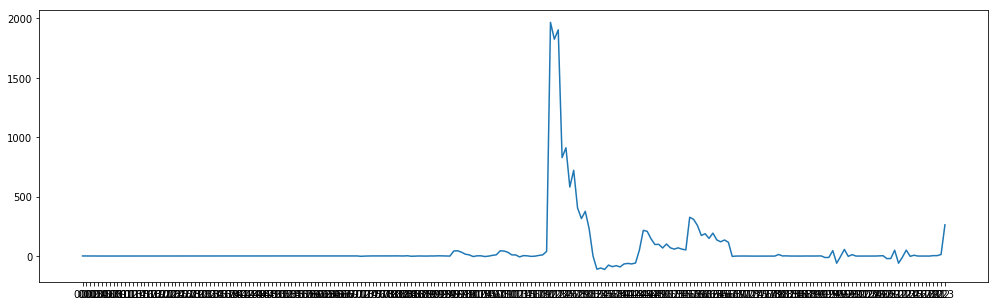

In [23]:
ipd.display(echonest['echonest', 'temporal_features'].head())
x = echonest.loc[2, ('echonest', 'temporal_features')]
plt.plot(x);

((2000, 2), (2000,))

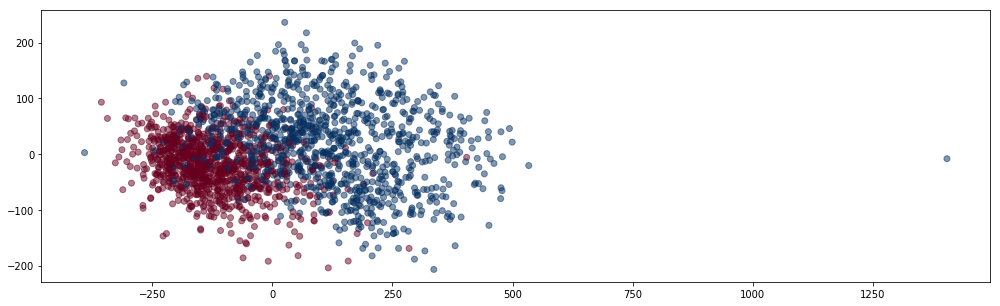

In [24]:
#3.2 Features like MFCCs are discriminant

small = tracks['set', 'subset'] <= 'small'
genre1 = tracks['track', 'genre_top'] == 'Instrumental'
genre2 = tracks['track', 'genre_top'] == 'Hip-Hop'

X = features.loc[small & (genre1 | genre2), 'mfcc']
X = skl.decomposition.PCA(n_components=2).fit_transform(X)

y = tracks.loc[small & (genre1 | genre2), ('track', 'genre_top')]
y = skl.preprocessing.LabelEncoder().fit_transform(y)

plt.scatter(X[:,0], X[:,1], c=y, cmap='RdBu', alpha=0.5)
X.shape, y.shape

In [45]:
#4 Audio
#You can load the waveform and listen to audio in the notebook itself.
print(AUDIO_DIR)
AUDIO_DIR = os.path.join('../fma_small')
filename = utils.get_audio_path(AUDIO_DIR, 2)
print('File: {}'.format(filename))

x, sr = librosa.load(filename, sr=None, mono=True)
print('Duration: {:.2f}s, {} samples'.format(x.shape[-1] / sr, x.size))

start, end = 7, 17
ipd.Audio(data=x[start*sr:end*sr], rate=sr)

/fma_small
File: ../fma_small/000/000002.mp3
Duration: 29.00s, 1322496 samples


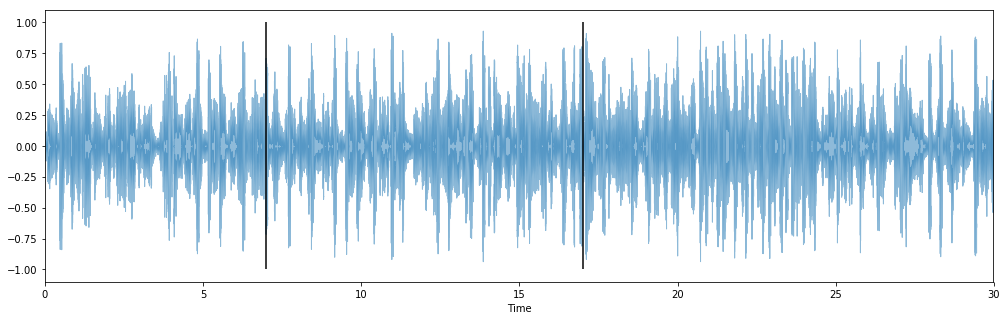

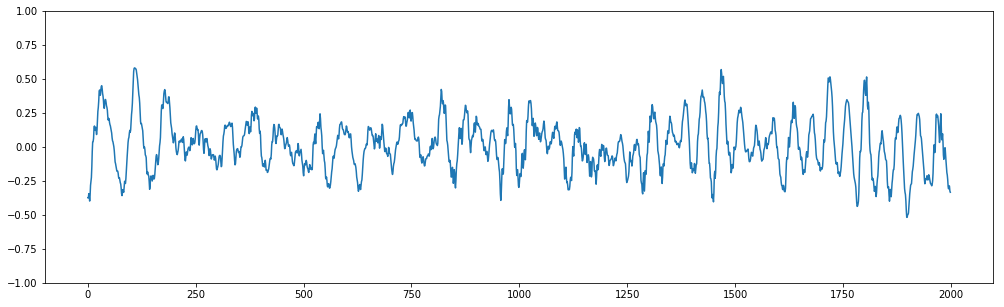

In [46]:
#And use librosa to compute spectrograms and audio features.

librosa.display.waveplot(x, sr, alpha=0.5);
plt.vlines([start, end], -1, 1)

start = len(x) // 2
plt.figure()
plt.plot(x[start:start+2000])
plt.ylim((-1, 1));

In [42]:
print(os.environ.get('./'))

None


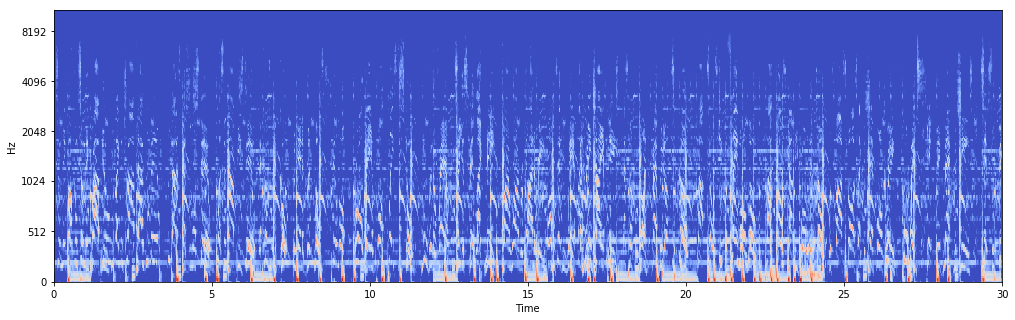

In [50]:
stft = np.abs(librosa.stft(x, n_fft=2048, hop_length=512))
mel = librosa.feature.melspectrogram(sr=sr, S=stft**2)
log_mel = librosa.amplitude_to_db(mel)

librosa.display.specshow(log_mel, sr=sr, hop_length=512, x_axis='time', y_axis='mel');

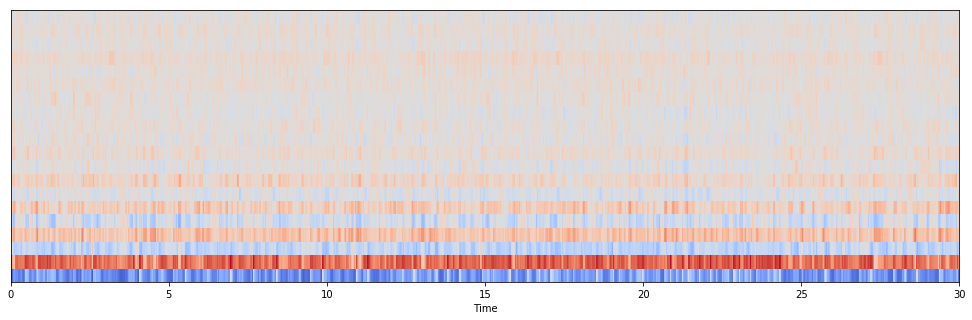

In [51]:
mfcc = librosa.feature.mfcc(S=librosa.power_to_db(mel), n_mfcc=20)
mfcc = skl.preprocessing.StandardScaler().fit_transform(mfcc)
librosa.display.specshow(mfcc, sr=sr, x_axis='time');

In [52]:
#5 Genre classification
#5.1 From features

small = tracks['set', 'subset'] <= 'small'

train = tracks['set', 'split'] == 'training'
val = tracks['set', 'split'] == 'validation'
test = tracks['set', 'split'] == 'test'

y_train = tracks.loc[small & train, ('track', 'genre_top')]
y_test = tracks.loc[small & test, ('track', 'genre_top')]
X_train = features.loc[small & train, 'mfcc']
X_test = features.loc[small & test, 'mfcc']

print('{} training examples, {} testing examples'.format(y_train.size, y_test.size))
print('{} features, {} classes'.format(X_train.shape[1], np.unique(y_train).size))

6400 training examples, 800 testing examples
140 features, 8 classes


In [53]:
# Be sure training samples are shuffled.
X_train, y_train = skl.utils.shuffle(X_train, y_train, random_state=42)

# Standardize features by removing the mean and scaling to unit variance.
scaler = skl.preprocessing.StandardScaler(copy=False)
scaler.fit_transform(X_train)
scaler.transform(X_test)

# Support vector classification.
clf = skl.svm.SVC()
clf.fit(X_train, y_train)
score = clf.score(X_test, y_test)
print('Accuracy: {:.2%}'.format(score))

Accuracy: 46.38%


In [108]:
import time
import os

import IPython.display as ipd
from tqdm import tqdm_notebook
import numpy as np
import pandas as pd
#import keras
#from keras.layers import Activation, Dense, Conv1D, Conv2D, MaxPooling1D, Flatten, Reshape

from sklearn.utils import shuffle
from sklearn.preprocessing import MultiLabelBinarizer, LabelEncoder, LabelBinarizer, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
#from sklearn.gaussian_process import GaussianProcessClassifier
#from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.multiclass import OneVsRestClassifier

import utils

In [100]:
#Subset

subset = tracks.index[tracks['set', 'subset'] <= 'medium']

assert subset.isin(tracks.index).all()
assert subset.isin(features.index).all()

features_all = features.join(echonest, how='inner').sort_index(axis=1)
print('Not enough Echonest features: {}'.format(features_all.shape))

tracks = tracks.loc[subset]
features_all = features.loc[subset]

tracks.shape, features_all.shape

Not enough Echonest features: (13129, 767)


((25000, 52), (25000, 518))

In [109]:
from sklearn.preprocessing import LabelEncoder
train = tracks.index[tracks['set', 'split'] == 'training']
val = tracks.index[tracks['set', 'split'] == 'validation']
test = tracks.index[tracks['set', 'split'] == 'test']

print('{} training examples, {} validation examples, {} testing examples'.format(*map(len, [train, val, test])))

genres = list(LabelEncoder().fit(tracks['track', 'genre_top']).classes_)
#genres = list(tracks['track', 'genre_top'].unique())
print('Top genres ({}): {}'.format(len(genres), genres))
genres = list(MultiLabelBinarizer().fit(tracks['track', 'genres_all']).classes_)
print('All genres ({}): {}'.format(len(genres), genres))

19922 training examples, 2505 validation examples, 2573 testing examples
Top genres (16): ['Blues', 'Classical', 'Country', 'Easy Listening', 'Electronic', 'Experimental', 'Folk', 'Hip-Hop', 'Instrumental', 'International', 'Jazz', 'Old-Time / Historic', 'Pop', 'Rock', 'Soul-RnB', 'Spoken']
All genres (151): [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 25, 26, 27, 30, 31, 32, 33, 36, 37, 38, 41, 42, 43, 45, 46, 47, 49, 53, 58, 63, 64, 65, 66, 70, 71, 74, 76, 77, 79, 81, 83, 85, 86, 88, 89, 90, 92, 94, 97, 98, 100, 101, 102, 103, 107, 109, 111, 113, 117, 118, 125, 130, 137, 138, 166, 167, 169, 171, 172, 174, 177, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 214, 224, 232, 236, 240, 247, 250, 267, 286, 296, 297, 311, 314, 322, 337, 359, 360, 361, 362, 374, 378, 400, 401, 404, 428, 439, 440, 441, 442, 443, 456, 468, 491, 495, 502, 504, 514, 524, 538, 539, 542, 580, 602, 619, 651, 659, 695, 741, 763, 808, 810, 811, 906, 1032, 1060, 1193, 1235]


In [110]:
#1 Multiple classifiers and feature sets
#Todo:

#3Cross-validation for hyper-parameters.
#Dimensionality reduction?
#1.1 Pre-processing
#In [5]:
def pre_process(tracks, features, columns, multi_label=False, verbose=False):
    if not multi_label:
        # Assign an integer value to each genre.
        enc = LabelEncoder()
        labels = tracks['track', 'genre_top']
        #y = enc.fit_transform(tracks['track', 'genre_top'])
    else:
        # Create an indicator matrix.
        enc = MultiLabelBinarizer()
        labels = tracks['track', 'genres_all']
        #labels = tracks['track', 'genres']

    # Split in training, validation and testing sets.
    y_train = enc.fit_transform(labels[train])
    y_val = enc.transform(labels[val])
    y_test = enc.transform(labels[test])
    X_train = features.loc[train, columns].as_matrix()
    X_val = features.loc[val, columns].as_matrix()
    X_test = features.loc[test, columns].as_matrix()
    
    X_train, y_train = shuffle(X_train, y_train, random_state=42)
    
    # Standardize features by removing the mean and scaling to unit variance.
    scaler = StandardScaler(copy=False)
    scaler.fit_transform(X_train)
    scaler.transform(X_val)
    scaler.transform(X_test)
    
    return y_train, y_val, y_test, X_train, X_val, X_test

In [111]:
#1.2 Single genre
#In [6]:
def test_classifiers_features(classifiers, feature_sets, multi_label=False):
    columns = list(classifiers.keys()).insert(0, 'dim')
    scores = pd.DataFrame(columns=columns, index=feature_sets.keys())
    times = pd.DataFrame(columns=classifiers.keys(), index=feature_sets.keys())
    for fset_name, fset in tqdm_notebook(feature_sets.items(), desc='features'):
        y_train, y_val, y_test, X_train, X_val, X_test = pre_process(tracks, features_all, fset, multi_label)
        scores.loc[fset_name, 'dim'] = X_train.shape[1]
        for clf_name, clf in classifiers.items():  # tqdm_notebook(classifiers.items(), desc='classifiers', leave=False):
            t = time.clock()
            clf.fit(X_train, y_train)
            score = clf.score(X_test, y_test)
            scores.loc[fset_name, clf_name] = score
            times.loc[fset_name, clf_name] = time.clock() - t
    return scores, times

def format_scores(scores):
    def highlight(s):
        is_max = s == max(s[1:])
        return ['background-color: yellow' if v else '' for v in is_max]
    scores = scores.style.apply(highlight, axis=1)
    return scores.format('{:.2%}', subset=pd.IndexSlice[:, scores.columns[1]:])

In [112]:
import time
# from time import process_time

classifiers = {
    'LR': LogisticRegression(),
    'kNN': KNeighborsClassifier(n_neighbors=200),
    'SVCrbf': SVC(kernel='rbf'),
    'SVCpoly1': SVC(kernel='poly', degree=1),
    'linSVC1': SVC(kernel="linear"),
    'linSVC2': LinearSVC(),
    #GaussianProcessClassifier(1.0 * RBF(1.0), warm_start=True),
    'DT': DecisionTreeClassifier(max_depth=5),
    'RF': RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    'AdaBoost': AdaBoostClassifier(n_estimators=10),
    'MLP1': MLPClassifier(hidden_layer_sizes=(100,), max_iter=2000),
    'MLP2': MLPClassifier(hidden_layer_sizes=(200, 50), max_iter=2000),
    'NB': GaussianNB(),
    'QDA': QuadraticDiscriminantAnalysis(),
}

feature_sets = {
#    'echonest_audio': ('echonest', 'audio_features'),
#    'echonest_social': ('echonest', 'social_features'),
#    'echonest_temporal': ('echonest', 'temporal_features'),
#    'echonest_audio/social': ('echonest', ('audio_features', 'social_features')),
#    'echonest_all': ('echonest', ('audio_features', 'social_features', 'temporal_features')),
}
for name in features.columns.levels[0]:
    feature_sets[name] = name
feature_sets.update({
    'mfcc/contrast': ['mfcc', 'spectral_contrast'],
    'mfcc/contrast/chroma': ['mfcc', 'spectral_contrast', 'chroma_cens'],
    'mfcc/contrast/centroid': ['mfcc', 'spectral_contrast', 'spectral_centroid'],
    'mfcc/contrast/chroma/centroid': ['mfcc', 'spectral_contrast', 'chroma_cens', 'spectral_centroid'],
    'mfcc/contrast/chroma/centroid/tonnetz': ['mfcc', 'spectral_contrast', 'chroma_cens', 'spectral_centroid', 'tonnetz'],
    'mfcc/contrast/chroma/centroid/zcr': ['mfcc', 'spectral_contrast', 'chroma_cens', 'spectral_centroid', 'zcr'],
    'all_non-echonest': list(features.columns.levels[0])
})

scores = test_classifiers_features(classifiers, feature_sets)

#ipd.display(format_scores(scores))
# ipd.display(times.style.format('{:.4f}'))

SEJveChjaGlsZHJlbj0oSW50UHJvZ3Jlc3ModmFsdWU9MCwgZGVzY3JpcHRpb249dSdmZWF0dXJlcycsIG1heD0xOCwgc3R5bGU9UHJvZ3Jlc3NTdHlsZShkZXNjcmlwdGlvbl93aWR0aD11J2nigKY=


/Users/tvishagangwani/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:24: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/Users/tvishagangwani/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:25: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/Users/tvishagangwani/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:26: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/Users/tvishagangwani/anaconda2/lib/python2.7/site-packages/sklearn/discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/tvishagangwani/anaconda2/lib/python2.7/site-packages/sklearn/discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/tvishagangwani/anaconda2/lib/python2.7/site-packages/sklearn/discriminant_analysis.py:682: UserWarning: Va

/Users/tvishagangwani/anaconda2/lib/python2.7/site-packages/sklearn/discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/tvishagangwani/anaconda2/lib/python2.7/site-packages/sklearn/discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/tvishagangwani/anaconda2/lib/python2.7/site-packages/sklearn/discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/tvishagangwani/anaconda2/lib/python2.7/site-packages/sklearn/discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/tvishagangwani/anaconda2/lib/python2.7/site-packages/sklearn/discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/tvishagangwani/anaconda2/lib/python2.7/site-packages/sklearn/discriminant_analysis.py:682: UserWarning:

AttributeError: 'tuple' object has no attribute 'style'

In [118]:
ipd.display(format_scores(scores[0])) 
# scores[0]* 100

In [127]:
scores[0]

dim  SVCpoly1      MLP1        DT  \
chroma_stft                             84.0  0.436455  0.483871  0.398756   
spectral_bandwidth                       7.0  0.403809  0.452002  0.429071   
zcr                                      7.0  0.429460  0.460552  0.436067   
rmse                                     7.0  0.376992  0.385931  0.386319   
spectral_rolloff                         7.0  0.414302  0.483482  0.453556   
mfcc                                   140.0  0.596580  0.527789  0.457054   
mfcc/contrast/chroma                   273.0  0.614846  0.545667  0.475709   
chroma_cqt                              84.0  0.399922  0.440731  0.354450   
mfcc/contrast/chroma/centroid/zcr      287.0  0.614846  0.531675  0.476875   
spectral_contrast                       49.0  0.495919  0.532452  0.435290   
tonnetz                                 42.0  0.402254  0.417412  0.359114   
spectral_centroid                        7.0  0.420909  0.475321  0.426739   
mfcc/contrast/chroma/centroid          280.0  0.612903  0.539837  0.475709   
mfcc/contrast/centroid                 196.0  0.614846  0.537894  0.476098   
mfcc/contrast/chroma/centroid/tonnetz  322.0  0.624951  0.559658  0.475709   
chroma_cens                             84.0  0.386319  0.398756  0.356782   
mfcc/contrast                          189.0  0.610183  0.537116  0.475709   
all_non-echonest                       518.0  0.619510  0.570929  0.472989   

                                         SVCrbf      MLP2       kNN       QDA  \
chroma_stft                            0.483094  0.453556  0.439176  0.056743   
spectral_bandwidth                     0.444617  0.450058  0.453945  0.341625   
zcr                                    0.454333  0.459775  0.447338  0.321026   
rmse                                   0.389040  0.389040  0.385154  0.150408   
spectral_rolloff                       0.475321  0.483482  0.462495  0.285270   
mfcc                                   0.609794  0.535950  0.549942  0.483871   
mfcc/contrast/chroma                   0.629227  0.572095  0.531286  0.513408   
chroma_cqt                             0.442674  0.383988  0.400311  0.033424   
mfcc/contrast/chroma/centroid/zcr      0.628061  0.566654  0.530120  0.514186   
spectral_contrast                      0.544501  0.488923  0.495531  0.417800   
tonnetz                                0.422464  0.355616  0.373105  0.230470   
spectral_centroid                      0.457054  0.472211  0.453556  0.361057   
mfcc/contrast/chroma/centroid          0.630781  0.554217  0.530120  0.513408   
mfcc/contrast/centroid                 0.633890  0.533618  0.552274  0.516906   
mfcc/contrast/chroma/centroid/tonnetz  0.631170  0.556160  0.526234  0.507190   
chroma_cens                            0.422853  0.337349  0.375049  0.246405   
mfcc/contrast                          0.630393  0.541003  0.553051  0.518461   
all_non-echonest                       0.628838  0.592693  0.517684  0.196269   

                                             NB   linSVC1   linSVC2        RF  \
chroma_stft                            0.041974  0.443451  0.432569  0.390983   
spectral_bandwidth                     0.361834  0.404197  0.406141  0.438399   
zcr                                    0.303925  0.427128  0.421298  0.435290   
rmse                                   0.117761  0.375437  0.373494  0.373494   
spectral_rolloff                       0.284881  0.416246  0.414691  0.449670   
mfcc                                   0.418578  0.591916  0.572872  0.437233   
mfcc/contrast/chroma                   0.390206  0.591139  0.593859  0.427128   
chroma_cqt                             0.015546  0.413914  0.403031  0.378158   
mfcc/contrast/chroma/centroid/zcr      0.389040  0.597746  0.594637  0.452390   
spectral_contrast                      0.394092  0.518072  0.489701  0.422853   
tonnetz                                0.223086  0.401477  0.394870  0.366887   
spectral_centroid                      0.33307

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c20e7fc10>,
      dtype=object)

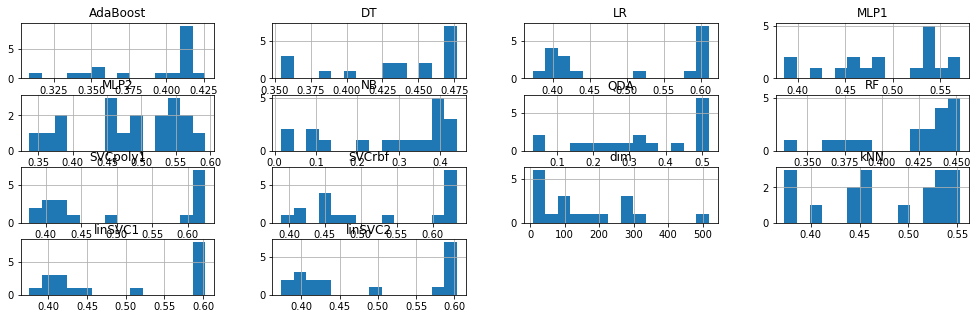

In [124]:
scores[0].hist(bins = 14)

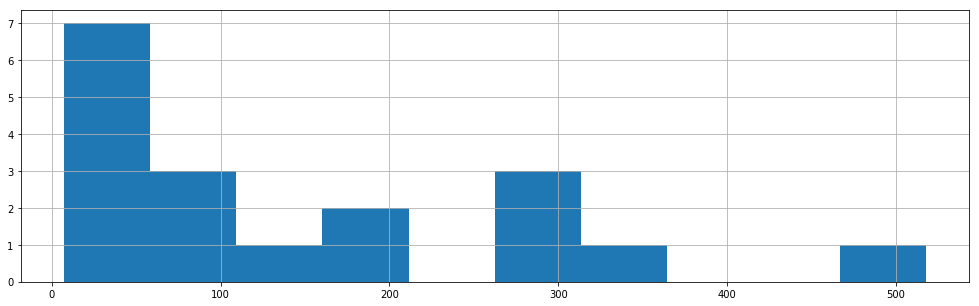

In [144]:
scores[0]["dim"].hist()

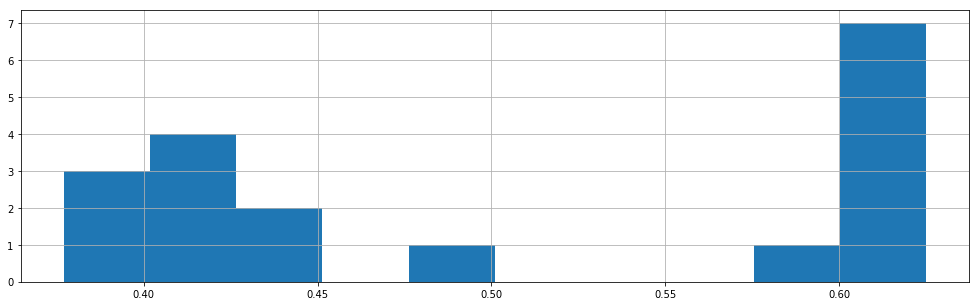

In [130]:
scores[0]["SVCpoly1"].hist()

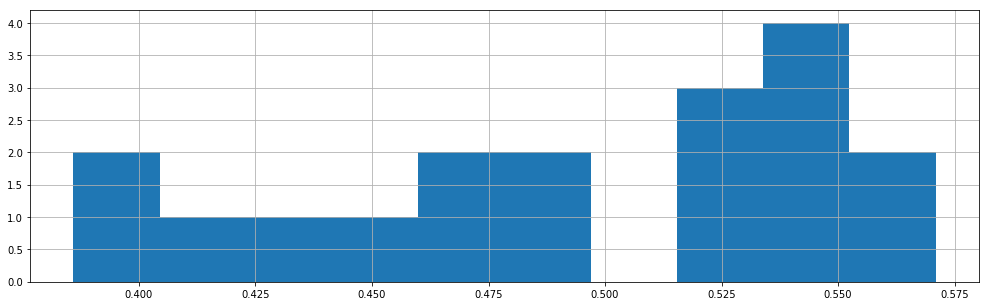

In [131]:
scores[0]["MLP1"].hist()

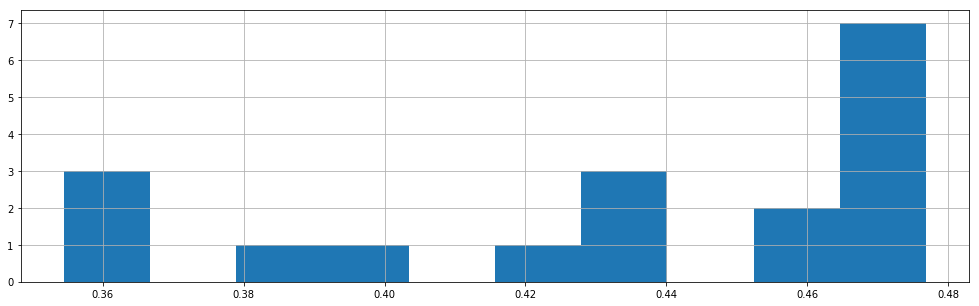

In [132]:
scores[0]["DT"].hist()

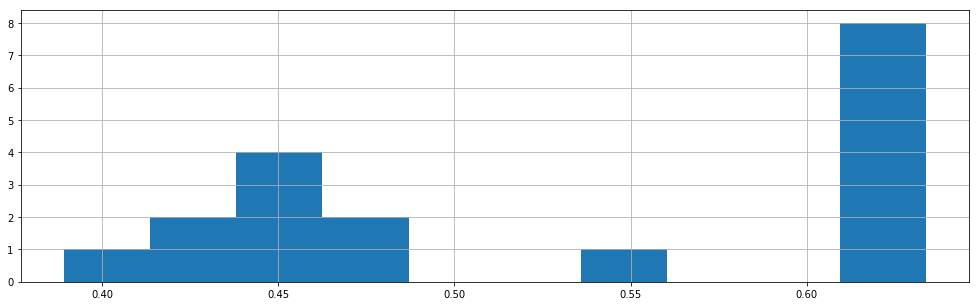

In [133]:
scores[0]["SVCrbf"].hist()

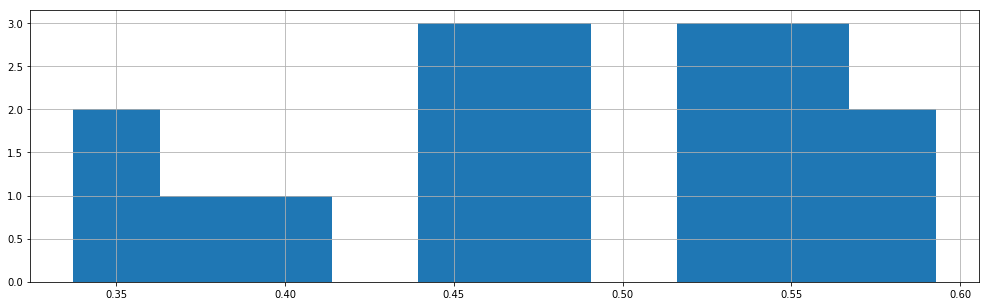

In [134]:
scores[0]["MLP2"].hist()

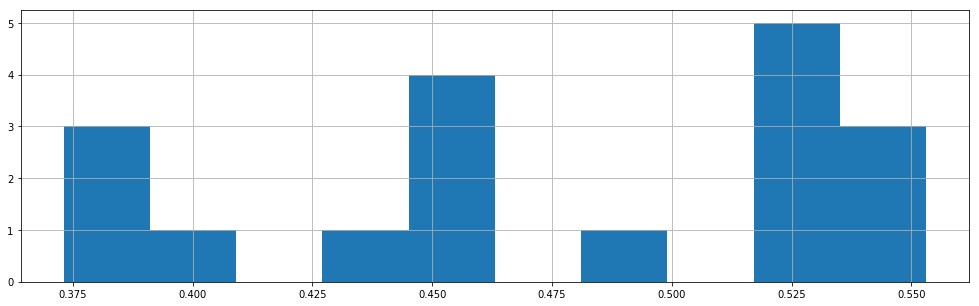

In [135]:
scores[0]["kNN"].hist()

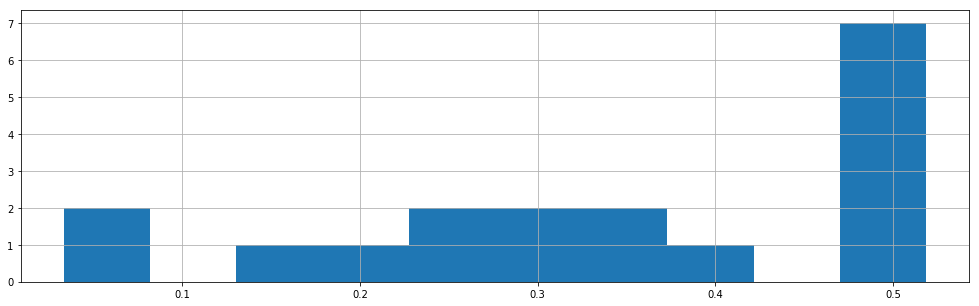

In [136]:
scores[0]["QDA"].hist()

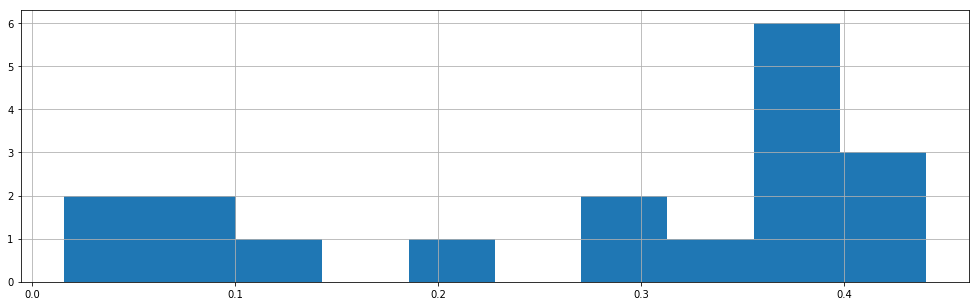

In [137]:
scores[0]["NB"].hist()

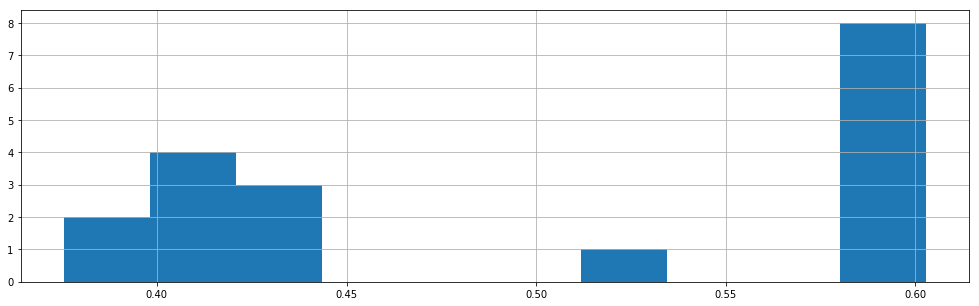

In [138]:
scores[0]["linSVC1"].hist()

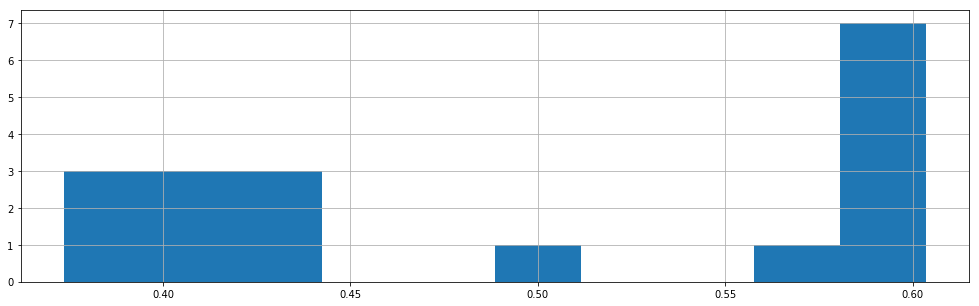

In [139]:
scores[0]["linSVC2"].hist()

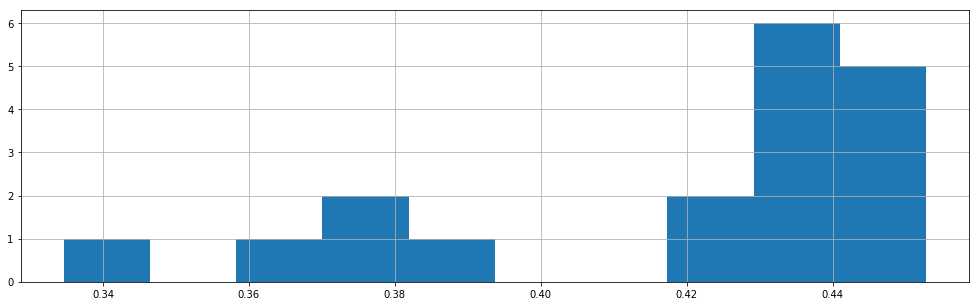

In [140]:
scores[0]["RF"].hist()